In [156]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

In [67]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [71]:
print("Training Images: ",train_images.shape)
print("Training Labels: ",train_labels.shape)
print("Testing Images: ",test_images.shape)
print("Testing Labels: ",test_labels.shape)


Training Images:  (50000, 32, 32, 3)
Training Labels:  (50000, 1)
Testing Images:  (10000, 32, 32, 3)
Testing Labels:  (10000, 1)


In [83]:
train_labels = train_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)

In [142]:
classes = ["ship", "truck","neither"]

In [147]:
def view_img(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    if(y[index]==8):
        plt.xlabel(classes[0])
    elif(y[index]==9):
        plt.xlabel(classes[1])
    else: 
        plt.xlabel(classes[2])


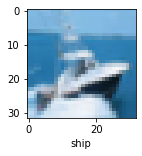

In [148]:
view_img(train_images, train_labels, 8)

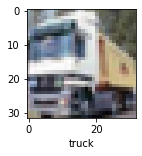

In [149]:
view_img(train_images, train_labels, 1)


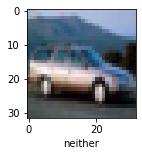

In [150]:
view_img(train_images, train_labels, 4)

In [151]:
train_images = train_images / 255.0
test_images = test_images / 255.0


### Simple ANN for image classification

In [158]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(train_images, train_labels, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 44s 28ms/step - loss: 1.8129 - accuracy: 0.3557
Epoch 2/5
1563/1563 [==============================] - 51s 33ms/step - loss: 1.6215 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.5401 - accuracy: 0.4564
Epoch 4/5
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4807 - accuracy: 0.4796
Epoch 5/5
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4320 - accuracy: 0.4950


In [164]:
labels_pred = ann.predict(test_images)
labels_pred_classes = [np.argmax(element) for element in labels_pred]



In [165]:
print("Classification Report: \n", classification_report(test_labels, labels_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.41      0.51      1000
           1       0.73      0.42      0.53      1000
           2       0.34      0.45      0.38      1000
           3       0.38      0.26      0.31      1000
           4       0.42      0.43      0.42      1000
           5       0.38      0.41      0.39      1000
           6       0.58      0.41      0.48      1000
           7       0.40      0.71      0.52      1000
           8       0.68      0.56      0.62      1000
           9       0.48      0.69      0.57      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [166]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [167]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [168]:
cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.4781 - accuracy: 0.4696
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1271 - accuracy: 0.6065
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9990 - accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9127 - accuracy: 0.6834
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8428 - accuracy: 0.7093
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7850 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7268 - accuracy: 0.7495
Epoch 8/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.6813 - accuracy: 0.7646
Epoch 9/10
1563/1563 [==============================] - 468s 299ms/step - loss: 0.6394 - accuracy: 0.7781 - loss: 0.6395 - accu
Epoch 10/10
1563/1563 [===============

In [169]:
cnn.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9344 - accuracy: 0.7044


[0.9343503713607788, 0.7044000029563904]

In [171]:
label_pred = cnn.predict(test_images)
label_pred[:5]

array([[1.16224219e-04, 1.10205910e-05, 1.26942678e-05, 9.36435938e-01,
        1.74196812e-05, 1.44118788e-02, 2.58923247e-02, 2.89939521e-08,
        2.30995305e-02, 2.87216358e-06],
       [7.39833899e-03, 3.35219651e-01, 1.13068390e-05, 9.07770982e-07,
        1.69606793e-07, 7.31778798e-08, 3.98141594e-07, 3.65743236e-09,
        6.56967580e-01, 4.01620142e-04],
       [7.26084590e-01, 1.21132411e-01, 4.44719160e-04, 2.43814453e-03,
        9.19958693e-04, 1.12165551e-04, 4.10234439e-04, 2.36859312e-03,
        4.71262410e-02, 9.89630669e-02],
       [9.49265420e-01, 4.30024276e-03, 1.33505405e-03, 4.90603619e-04,
        2.68044736e-04, 2.25356666e-06, 6.86145446e-04, 1.65194360e-05,
        4.36026007e-02, 3.31617121e-05],
       [1.33350045e-06, 9.74451632e-06, 1.38358116e-01, 2.02100232e-01,
        1.84977278e-01, 3.72695085e-03, 4.70648438e-01, 6.49755236e-08,
        1.77880967e-04, 1.42555034e-08]], dtype=float32)

In [172]:
labelled_classes = [np.argmax(element) for element in label_pred]
labelled_classes[:5]

[3, 8, 0, 0, 6]

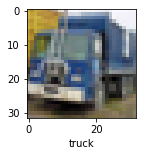

In [178]:
view_img(test_images, test_labels,14)